In [1]:
import plotnine as p9
from mizani.formatters import comma_format
from ug2021.data import results

candidate_colors = {
    "Museveni": "#F3C02A",
    "Kyagulanyi": "#E41E2F",
    "Amuriat": "#006BFF",
    "Muntu": "#9954AD",
    "Mao": "#028100",
    "Tumukunde": "gray",
    "Kabuleta": "gray",
    "Kalembe": "gray",
    "Katumba": "gray",
    "Mwesigye": "gray",
    "Mayambala": "gray",
}

p9.theme_set(p9.theme_light())

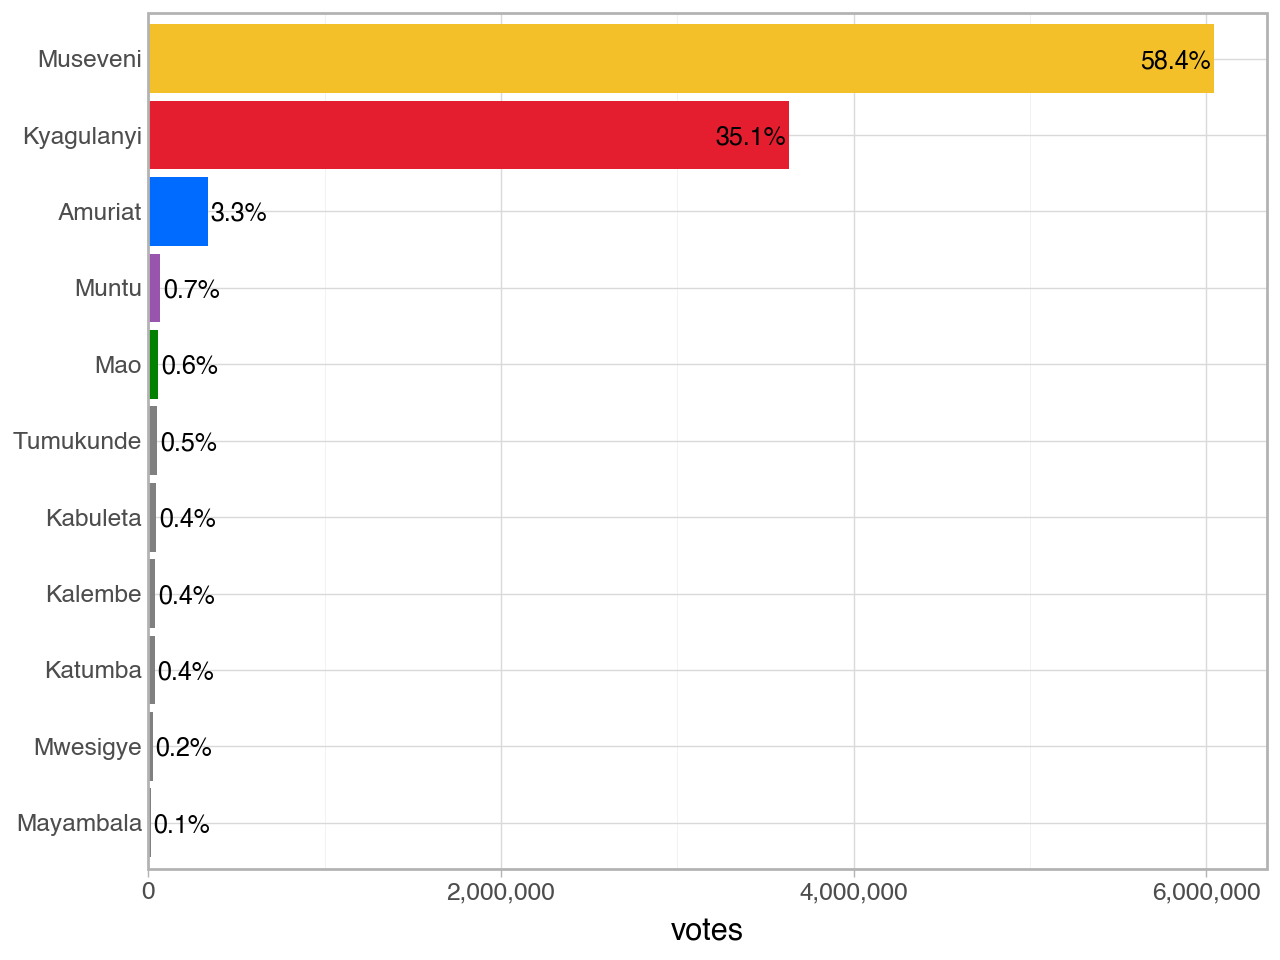

In [2]:
def ha_align_left(s, threshold):
    return ["left" if x <= threshold else "right" for x in s]

def add_plus_minus(s, threshold, amount):
    return [amount if x <= threshold else -amount for x in s]

p = (
    results.national_long
    >> p9.ggplot(p9.aes("reorder(candidate, votes)", "votes"))
    + p9.geom_col(p9.aes(fill="candidate"), show_legend=False)
    + p9.geom_text(
        p9.aes(
            label="100*votes / valid",
            ha=p9.after_stat("ha_align_left(label, 3.3)"),
            y=p9.stage("votes", "y+add_plus_minus(label, 3.3, 15000)")
        ),
        format_string="{:.1f}%",
        size=9,
        va="center_baseline",
    )
    + p9.scale_y_continuous(expand=(0, 0, .05, 0), labels=comma_format())
    + p9.scale_fill_manual(values=candidate_colors)
    + p9.labs(x="")
    + p9.coord_flip()
    + p9.theme(
        #dpi=200,
        axis_ticks_y=p9.element_blank()
    )
)
p